In [ ]:
!pip install -r ../requirements.txt

In [1]:
import os
import numpy as np
import nltk
import pandas as pd
import json
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from nltk import word_tokenize
import string
import json
import unidecode 
import re

import warnings
warnings.filterwarnings('ignore')

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/kian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kian/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## --------------------------- Reading and Preprocessing data ---------------------------

In [9]:
from preprocessing import Preprocessor


class DataReader:
    def __init__(self, read_from_excels=True):
        preprocessor = Preprocessor()
        if read_from_excels:
            dfs = []
            for file in os.listdir("../Excels"):
                df = pd.read_excel(os.path.join("../Excels", file))
                dfs.append(df)
                print(file, end=": ")
                print(df.shape)
            df = pd.concat(dfs)
            
            df = df[df['Language'] == 'en']
            df.reset_index(drop=True, inplace=True)
            df.drop_duplicates(subset="Text", keep='first', inplace=True, ignore_index=True)
            
            df = preprocessor.perform_clean_lemmatize_tokenize(df)
            self.df = df
            
        else:
            df = pd.read_csv("../all.csv")
            df = df[df['Language'] == 'en']
            df.reset_index(drop=True, inplace=True)
            df.drop_duplicates(subset="Text", keep='first', inplace=True, ignore_index=True)
            self.df = df
        

In [16]:
data_reader = DataReader(read_from_excels=True)
df = data_reader.df

[nltk_data] Downloading package stopwords to /Users/kian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


googleAI.xlsx: (1988, 19)
science.xlsx: (2080, 19)
JoeBiden.xlsx: (2066, 19)
trump.xlsx: (2080, 19)
inflation.xlsx: (2080, 19)
nvidia.xlsx: (2010, 19)
Meta.xlsx: (1644, 19)
ISS.xlsx: (2053, 19)
Google.xlsx: (2051, 19)
robots.xlsx: (1982, 19)
Twitter.xlsx: (1616, 19)
abortion.xlsx: (2080, 19)
IranPolitics.xlsx: (2080, 19)
elon.xlsx: (2010, 19)
metaverse.xlsx: (1553, 19)
nasa.xlsx: (2080, 19)
workers.xlsx: (2079, 19)
Microsoft.xlsx: (2080, 19)
democrats.xlsx: (2072, 19)
facebook.xlsx: (2027, 19)
techSalary.xlsx: (1207, 19)
developers.xlsx: (2080, 19)
AbortionBan.xlsx: (2080, 19)
ukraine.xlsx: (2080, 19)
spaceX.xlsx: (2010, 19)
WWDC.xlsx: (2080, 19)
tech.xlsx: (2076, 19)
instagram.xlsx: (1949, 19)
Amazon.xlsx: (2078, 19)
Apple.xlsx: (2031, 19)
war.xlsx: (2079, 19)
AbortionRightsAreHumanRights.xlsx: (2080, 19)
rocket.xlsx: (2056, 19)
Tesla.xlsx: (2004, 19)


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 26363/26363 [00:01<00:00, 16541.34it/s]


In [20]:
df.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,...,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18,cleaned_tweets,lemmatized_tweets,Text_words
0,1542458355796566016,@Reuters How not considering that any AI we cr...,The Hermit - Current thing emojis 👨‍⚕️🔪👶,ABetterTale,2022-06-30T10:41:44.000Z,Thu Jun 30 10:41:44 +0000 2022,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,0,1,NaN,NaN,NaN,NaN,NaN,considering ai create grow enslaved default al...,consider ai create grow enslave default also p...,"[consider, ai, create, grow, enslave, default,..."
1,1542457987264135168,Many people believe they are talking to a cons...,OnBRM,OnBRM,2022-06-30T10:40:16.000Z,Thu Jun 30 10:40:16 +0000 2022,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,5,0,NaN,NaN,NaN,NaN,NaN,many people believe talking conscious entity u...,many people believe talk conscious entity use ...,"[many, people, believe, talk, conscious, entit..."
2,1542457779595743233,RigiTech tests drone delivery service to a sub...,Channel969,channel969,2022-06-30T10:39:26.000Z,Thu Jun 30 10:39:26 +0000 2022,0,0,en,"<a href=""https://channel969.com"" rel=""nofollow...",...,10,0,photo,https://pbs.twimg.com/media/FWfpLODWIAENDR7.jpg,NaN,NaN,NaN,rigitech tests drone delivery service substati...,rigitech test drone delivery service substatio...,"[rigitech, test, drone, delivery, service, sub..."
3,1542457298894856192,Flutter: IOS version stuck on flash screen and...,Channel969,channel969,2022-06-30T10:37:32.000Z,Thu Jun 30 10:37:32 +0000 2022,0,0,en,"<a href=""https://channel969.com"" rel=""nofollow...",...,10,0,NaN,NaN,NaN,NaN,NaN,flutter ios version stuck flash screen showing...,flutter ios version stick flash screen show wa...,"[flutter, ios, version, stick, flash, screen, ..."
4,1542457244205387778,"RT @wienerlibrary : ""Visiting the POLIN museum...",Abucc,ABuccetti,2022-06-30T10:37:19.000Z,Thu Jun 30 10:37:19 +0000 2022,0,0,en,"<a href=""http://twitter.com/#!/download/ipad"" ...",...,0,0,photo,https://pbs.twimg.com/media/FWcTFKLXwAIRS8e.jpg,NaN,NaN,NaN,visiting polin museum daniel patt realized cou...,visit polin museum daniel patt realize could w...,"[visit, polin, museum, daniel, patt, realize, ..."


In [19]:
df['Text_words'].explode().value_counts().reset_index().head()

,index,Text_words
0,',2188
1,us,2051
2,get,2009
3,new,1666
4,say,1487


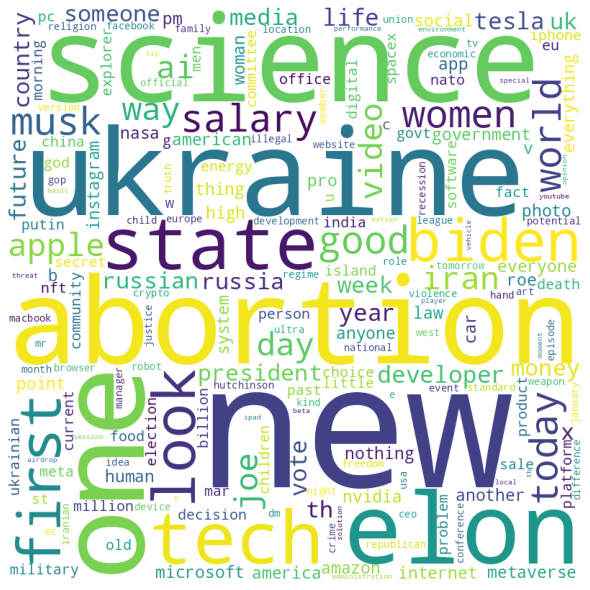

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = " ".join(set(df['Text_words'].explode()) - {np.nan})
all_words = " ".join(df['Text_words'].explode().value_counts().reset_index()['index'])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [10]:
nltk.FreqDist(df['Text_words'].explode()).most_common(20)

[("'", 2188),
 ('us', 2051),
 ('get', 2009),
 ('new', 1674),
 ('say', 1487),
 ('abortion', 1479),
 ('trump', 1477),
 ('war', 1450),
 ('like', 1435),
 ('make', 1392),
 ('go', 1336),
 ('people', 1332),
 ('s', 1285),
 ('science', 1134),
 ('time', 1117),
 ('right', 1108),
 ('workers', 1107),
 ('democrats', 1099),
 ('use', 1089),
 ('ukraine', 1085)]

## TF-IDF Search ---------------------------

In [7]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer

class TFIDFSearch:
    def __init__(self):
        self.vocabulary = list(set(df['Text_words'].explode()) - {np.nan})

        self.tfidf = TfidfVectorizer(vocabulary=self.vocabulary)
        self.tfidf_tran=self.tfidf.fit_transform(df['Text_words'].apply(lambda x: ' '.join(x)))

    def get_vector(self, tokens):
        result = np.zeros((len(self.vocabulary)))
        x= self.tfidf.transform(tokens)
        for token in tokens:
            try:
                ind = self.vocabulary.index(token)
                result[ind]  = x[0, self.tfidf.vocabulary_[token]]
            except Exception as e:
                print(e)
                pass
        return result

    @staticmethod
    def cosine_sim(a, b):
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        if norm_a == 0 or norm_b == 0:
            return 0
        cos_sim = np.dot(a, b)/(norm_a*norm_b)
        return cos_sim

    def search(self, k, query):
        tokens = preprocessor.clean_query(query)
        tokens = [token for token in tokens if token in self.vocabulary]
        print(tokens)
        q_df = pd.DataFrame(columns=['q_clean'])
        q_df.loc[0, 'q_clean'] = tokens

        d_cosines = []

        query_vector = self.get_vector(tokens)
        print(sum(query_vector))
        for d in self.tfidf_tran.A:
            d_cosines.append(self.cosine_sim(query_vector, d))

        out = np.array(d_cosines).argsort()[-k:][::-1]
        a = pd.DataFrame()
        for i, index in enumerate(out):
            a.loc[i, 'index'] = str(index)
            a.loc[i, 'text'] = df.iloc[index]['Text']
            a.loc[i, 'words'] = str(df.iloc[index]['Text_words'])
            a.loc[i, 'Score'] = d_cosines[int(index)]
        return a

In [12]:
model = TFIDFSearch()
results = model.search(10, "Eluon musk")
results

['musk']
1.0


,index,text,words,Score
0,13687,RT @Professorr01 : @SaitaKanOnline @cryptogirl...,"['elon', 'musk']",0.743127
1,13785,To Elon Musk https://t.co/VcivwJOLtf,"['elon', 'musk']",0.743127
2,2540,Elon Musk replied to @DJSnM #SpaceX https://t....,"['elon', 'musk']",0.743127
3,2262,Elon Musk replied to @Rainmaker1973 #SpaceX ht...,"['elon', 'musk']",0.743127
4,13246,@ExplainThisBob Why is Elon Musk??,"['elon', 'musk']",0.743127
5,13197,RT @ExplainThisBob : When is Elon Musk?,"['elon', 'musk']",0.743127
6,2504,RT @EveryElonReply : Elon Musk replied to @elo...,"['elon', 'musk']",0.743127
7,2551,Elon Musk replied to @SpaceX #SpaceX https://t...,"['elon', 'musk']",0.743127
8,2526,Elon Musk replied to @SirineAti #SpaceX https:...,"['elon', 'musk']",0.743127
9,2445,RT @EveryElonReply : Elon Musk replied to @Erd...,"['elon', 'musk']",0.743127


## Boolean Search ---------------------------

In [8]:
class BooleanSearch:
    def __init__(self):
        self.vocabulary = list(set(df['Text_words'].explode()) - {np.nan})
        self.vocabulary_index = {word: idx for idx, word in enumerate(self.vocabulary)}

        self.mat = np.zeros((len(df), len(self.vocabulary)), )

        for index, row in df.iterrows():
            for token in row['Text_words']:
                self.mat[index][self.vocabulary_index[token]] = 1


    def search(self, k, query):
        #print("Cosine Similarity")
        tokens = preprocessor.clean_query(query)
        query_vector = []
        for token in tokens:
            if token in self.vocabulary_index:
                query_vector.append(self.vocabulary_index[token])
        out = []
        for index, vec in enumerate(self.mat):
            flag = True
            for token_index in query_vector:
                if vec[token_index] == 0:
                    flag = False
                    break
            if flag:
                out.append(index)
            if len(out) == k:
                break
        print(out)
        a = pd.DataFrame()
        for i, index in enumerate(out):
            a.loc[i, 'index'] = str(index)
            a.loc[i, 'text'] = df.iloc[index]['Text']
            a.loc[i, 'words'] = str(df.iloc[index]['Text_words'])

        return a

In [14]:
model = BooleanSearch()
model.search(10, "Elooon Musk")

[20, 78, 269, 2080, 2086, 2108, 2118, 2119, 2137, 2138]


,index,text,words
0,20,Elon Musk give me MONEY bitch And don't forge...,"['elon', 'musk', 'give', 'money', 'bitch', 'fo..."
1,78,"Elon Musk give me $10,000 AND Putin a giant s...","['elon', 'musk', 'give', 'putin', 'giant', 'sp..."
2,269,"Elon Musk give me $99,000 AND Putin elegant a...","['elon', 'musk', 'give', 'putin', 'elegant', '..."
3,2080,what if Gerald Cotten is Elon Musk (:)\n@elonm...,"['gerald', 'cotten', 'elon', 'musk', 'musk']"
4,2086,#SpaceX (@SpaceX) will get ready to take off i...,"['spacex', 'get', 'ready', 'take', 'first', 'o..."
5,2108,How China could kill Space X.\nSpace X's space...,"['china', 'could', 'kill', 'space', 'x', 'spac..."
6,2118,RT @TweakTown : Elon Musk says @SpaceX's Stars...,"['elon', 'musk', 'say', 'starship', 'rocket', ..."
7,2119,Elon Musk says @SpaceX's Starship rocket 'will...,"['elon', 'musk', 'say', 'starship', 'rocket', ..."
8,2137,RT @ElonMuskRadio : @kamaltalwar79 @convl0 @Th...,"['hate', 'love', 'respect', '.', 'awe', '.', '..."
9,2138,@kamaltalwar79 @convl0 @TheDogeBird @inmuskweb...,"['hate', 'love', 'respect', '.', 'awe', '.', '..."


## FastText ---------------------------

In [9]:
import fasttext.util

class FastText:
    def __init__(self):
        fasttext.util.download_model('en', if_exists='ignore')  # English
        self.ft = fasttext.load_model("./cc.en.300.bin")
        
        self.text_vectors = []
        self.words_count = []
        for _, row in df.iterrows():
            self.words_count.append(len(row['Text_words']))
            self.text_vectors.append(self.tokens_to_vec(row['Text_words']))

    def tokens_to_vec(self, tokens):
        cur_vectors = []
        if len(tokens) == 0:
            return np.zeros(self.ft.get_dimension())
        for token in tokens:
            cur_vectors.append(self.ft.get_word_vector(token))
        return np.asarray(np.average(cur_vectors, axis=0, keepdims=True))[0]

    @staticmethod
    def cosine_sim(a, b):
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        if norm_a == 0 or norm_b == 0:
            return 0
        cos_sim = np.dot(a, b)/(norm_a*norm_b)
        return cos_sim

    def search(self, k, query):
        tokens = preprocessor.clean_query(query)
        query_vector = self.tokens_to_vec(tokens)
        d_cosines = []
        print(tokens)
        for idx, d in enumerate(self.text_vectors):
            d_cosines.append(self.cosine_sim(d, query_vector))
            if self.words_count[idx] > 10:
                d_cosines[-1] += 0.2
            elif self.words_count[idx] > 5:
                d_cosines[-1] += 0.1

        out = np.array(d_cosines).argsort()[-k:][::-1]
        a = pd.DataFrame()
        for i, index in enumerate(out):
            a.loc[i, 'index'] = str(index)
            a.loc[i, 'text'] = df.iloc[index]['Text']
            a.loc[i, 'words'] = str(df.iloc[index]['Text_words'])
            a.loc[i, 'Score'] = d_cosines[int(index)]
        return a

In [17]:
pd.set_option('display.max_colwidth', 150)

In [10]:
models = [FastText(), BooleanSearch(), TFIDFSearch(), ]

# ---------------------------- Evalutation ----------------------------

In [14]:
class Evaluator:
    queries = [
        "how to became full stack developer",
        "Microsoft Internet Explorer age",
        "Tesla price",
        "Macbook M2 Price",
        "Abortion rights",
        "Ukraine war",
        "Raisi",
        "Harry potter",
        "Covid vaccine",
        "Meta VR"
    ]

    def run(self):
        scores = np.zeros((len(self.queries),len(models)))
        for idxq, query in enumerate(self.queries):
            for idxm, model in enumerate(models):
                result = model.search(10, query)
                for idxr, row in result.iterrows():
                    print("-"*100)
                    print(">", query)
                    print(row['text'])
                    if input("Are result related to query?(y/n)").lower() == 'y':
                        scores[idxq][idxm] = 1/(idxr + 1)
                        break
        self.scores = scores
evaluator = Evaluator()
evaluator.run()

['become', 'full', 'stack', 'developer']
----------------------------------------------------------------------------------------------------
> how to became full stack developer
@TreciaKS You are either a front end or full stack developer coz as a Backend developer I rarely get that urge 😁
Are result related to query?(y/n)n
----------------------------------------------------------------------------------------------------
> how to became full stack developer
RT @YuHelenYu : Roadmap to Full Stack Developer 
#AI #DataSecurity #dataScientist #DataAnalytics #RStats #Reactjs #IIoT #flutter #javascript #java #TensorFlow #Cloud #coding #BigData #5G #MachineLearning  #R #reddit #WomenInSTEM  #fintech #tech #blockchain #DataScience  #100DaysOfCode #Jobs https://t.co/o1ATvNKGn9
Are result related to query?(y/n)y
[5264]
----------------------------------------------------------------------------------------------------
> how to became full stack developer
Be job-ready with Ashwat School. Become

Are result related to query?(y/n)y
['macbook', 'price']
----------------------------------------------------------------------------------------------------
> Macbook M2 Price
And Now This:  Apple M2 iPad Pro series prices leaked along with details about more-responsive iPad mini and laminated iPad - https://t.co/zuY25fN6cg

#technology #tech #technews

Read More Here:
https://t.co/5LewoWNDke
Are result related to query?(y/n)y
[12731, 12938, 12971]
----------------------------------------------------------------------------------------------------
> Macbook M2 Price
C$34.2 - #FreeShipping | Amazing deals at amazing low prices  The Decal Guru Apple Sauce Shot MacBook Decal #TheDecalGuru       👉 https://t.co/CWRarWy6gX       #sharious  #canadianbestseller  #canada #usa #product #1268MAC13XDB  #2016  #Apple  #Decal . https://t.co/srtyxsiB0o
Are result related to query?(y/n)y
['macbook', 'price']
1.0
------------------------------------------------------------------------------------------

Are result related to query?(y/n)y
[7249, 7268, 7351, 7357, 7446, 7458, 7525, 7789, 8205, 11330]
----------------------------------------------------------------------------------------------------
> Meta VR
RT @quantum_input : Meta wants its next VR headset to replace your laptop https://t.co/x6Mf0r5ZNS #Meta #Vr
Are result related to query?(y/n)y
['meta', 'vr']
1.0
----------------------------------------------------------------------------------------------------
> Meta VR
Report: Meta to Release First AR Glasses to Developers Only &amp; Not Consumers #meta #ar #vr #edtech #edtechchat #edchat | @scoopit https://t.co/FXvg88aBxH
Are result related to query?(y/n)y


In [15]:
pd.DataFrame({
    "models": map(lambda x: x.__class__.__name__, models),
    "scores": evaluator.scores.mean(axis=0),
})

,models,scores
0,FastText,0.900000
1,BooleanSearch,0.850000
2,TFIDFSearch,0.766667
